In [8]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix


In [10]:
## Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0


In [12]:
## Build model (Functional API)
## MLP model with explicit initializer (just for clarity)
inputs = Input(shape=(784,))
x = Dense(256, activation='relu', kernel_initializer='glorot_uniform')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dropout(0.3)(x)
outputs = Dense(10, activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=inputs, outputs=outputs)

In [13]:
## Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
## Train
history = model.fit(x_train, y_train, validation_split=0.1, epochs=15, batch_size=128)



Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6966 - loss: 0.8543 - val_accuracy: 0.8508 - val_loss: 0.4159
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8350 - loss: 0.4585 - val_accuracy: 0.8585 - val_loss: 0.3854
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8506 - loss: 0.4090 - val_accuracy: 0.8673 - val_loss: 0.3612
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8631 - loss: 0.3749 - val_accuracy: 0.8773 - val_loss: 0.3430
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8687 - loss: 0.3585 - val_accuracy: 0.8760 - val_loss: 0.3458
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8737 - loss: 0.3426 - val_accuracy: 0.8720 - val_loss: 0.3385
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8792 - loss: 0.3296 - val_accuracy: 0.8802 - val_loss: 0.3210
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8830 - loss: 0.3212 - val_accuracy:

In [15]:
## Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.3375
Test accuracy: 0.8840000033378601


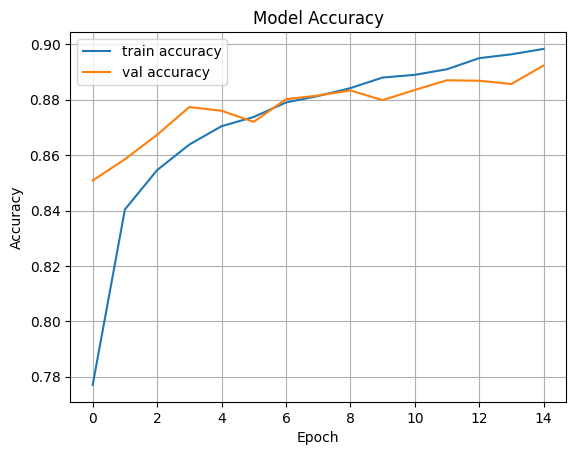

In [16]:
## Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

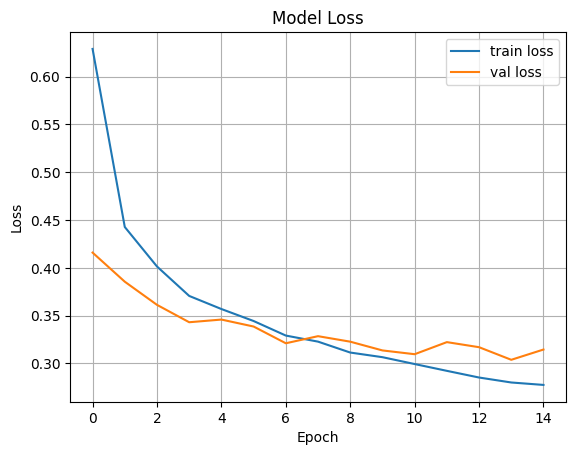

In [17]:
## Loss plot
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


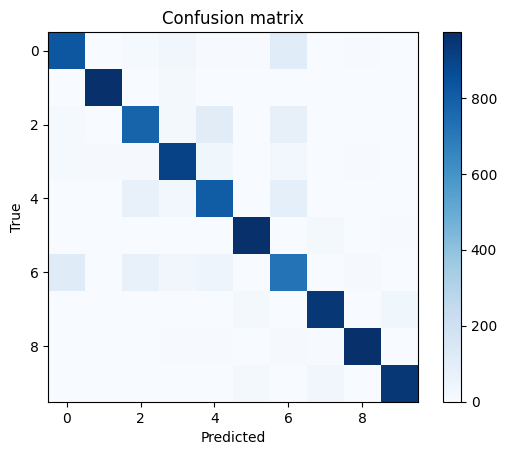

In [18]:
## Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure()
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()